In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('kaggle_train.csv')
test = pd.read_csv('kaggle_test.csv')

In [3]:
corr = train.corrwith(train.money_made_inv)
corr.sort_values(ascending = False)

money_made_inv          1.000000
bc_util                 0.095192
pub_rec                 0.057876
delinq_2yrs             0.049182
int_rate                0.049109
acc_open_past_24mths    0.048269
total_rec_late_fee      0.033735
num_tl_90g_dpd_24m      0.025438
tot_coll_amt            0.024828
pub_rec_bankruptcies    0.023218
acc_now_delinq          0.021542
num_tl_30dpd            0.015502
num_tl_120dpd_2m        0.013539
mort_acc                0.003898
delinq_amnt             0.001890
dti                     0.001325
num_sats               -0.037346
avg_cur_bal            -0.056990
annual_inc             -0.064129
tot_cur_bal            -0.077973
id                     -0.299772
loan_amnt              -0.403774
out_prncp_inv          -0.965511
dtype: float64

In [152]:
model = smf.ols(formula = 'money_made_inv~bc_util+out_prncp_inv', data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         money_made_inv   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 4.027e+04
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:14:57   Log-Likelihood:                -51233.
No. Observations:                5778   AIC:                         1.025e+05
Df Residuals:                    5775   BIC:                         1.025e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -33.3026     52.624     -0.633      0.527    -136.465      69.860
bc_util           6.9113      0.792      8.725      0.000       5.358       8.464
out_prncp_inv    -0.8557      0.003   -282.413      0.000      -0.862      -0.850
==============================================================================
Omnibus:                     3910.573   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65091.482
Skew:                           3.044   Prob(JB):                         0.00
Kurtosis:                      18.274   Cond. No.                     2.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
prediction = model.predict(train)
np.sqrt(((train.money_made_inv - prediction)**2).mean())

1716.2994409881856

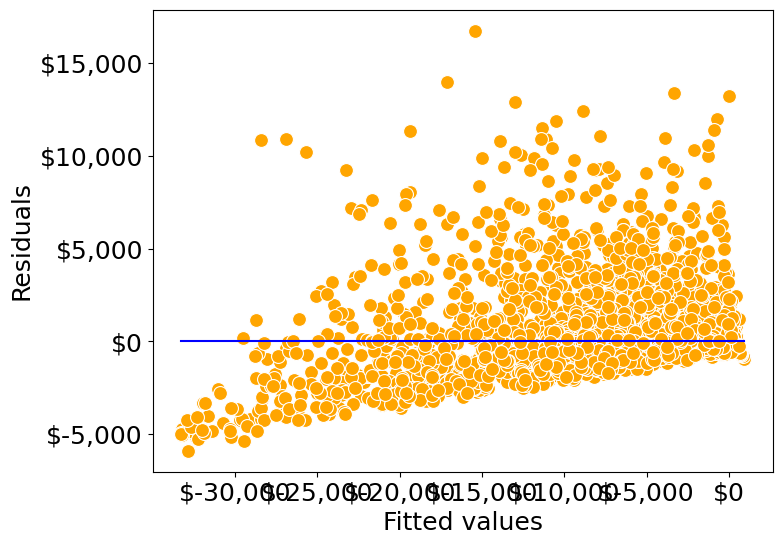

In [154]:
plt.rcParams["figure.figsize"] = (8,6)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [prediction.min(),prediction.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')

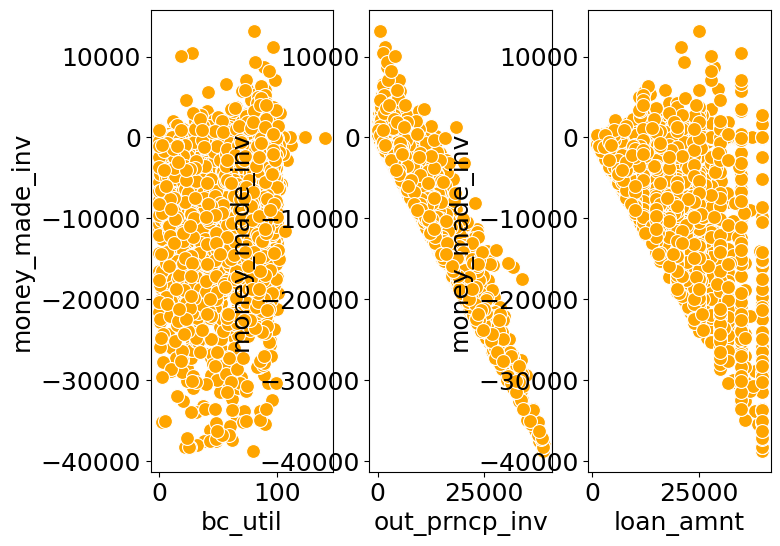

In [155]:
fig, axes = plt.subplots(1, 3)

# bc_util
ax = sns.scatterplot(x = train.bc_util, y=train.money_made_inv,color = 'orange', ax=axes[0])

# out_prncp
ax1 = sns.scatterplot(x = train.out_prncp_inv, y=train.money_made_inv, color = 'orange', ax=axes[1])

# loan_amnt
ax1 = sns.scatterplot(x = train.loan_amnt, y=train.money_made_inv, color = 'orange', ax=axes[2])

In [156]:
model1 = smf.ols(formula = '(money_made_inv**2)~bc_util+out_prncp_inv+I(out_prncp_inv**2)+bc_util*out_prncp_inv', data = train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         money_made_inv   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.346e+04
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:14:59   Log-Likelihood:                -50817.
No. Observations:                5778   AIC:                         1.016e+05
Df Residuals:                    5773   BIC:                         1.017e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -78.8767     56.071     -1.407      0.160    -188.796      31.043
bc_util                   3.5072      0.857      4.093      0.000       1.827       5.187
out_prncp_inv            -0.7192      0.009    -75.762      0.000      -0.738      -0.701
I(out_prncp_inv ** 2) -7.794e-06   2.82e-07    -27.654      0.000   -8.35e-06   -7.24e-06
bc_util:out_prncp_inv     0.0010      0.000      9.193      0.000       0.001       0.001
==============================================================================
Omnibus:                     4011.583   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78559.911
Skew:                           3.091   Prob(JB):                         0.00
Kurtosis:                      19.973   Cond. No.                     5.56e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
prediction1 = model1.predict(train)
np.sqrt(((train.money_made_inv - np.sqrt(prediction1))**2).mean())

/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


98.4850858726925

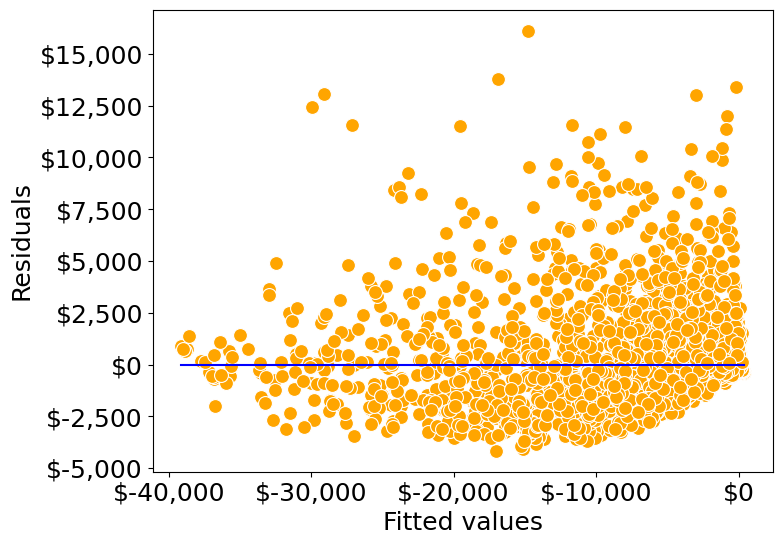

In [158]:
plt.rcParams["figure.figsize"] = (8,6)
ax = sns.scatterplot(x = model1.fittedvalues, y=model1.resid,color = 'orange')
sns.lineplot(x = [prediction1.min(),prediction1.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')

In [159]:
model2 = smf.ols(formula = 'money_made_inv~bc_util+out_prncp_inv+I(out_prncp_inv**2)+bc_util*out_prncp_inv', data = train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         money_made_inv   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.346e+04
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:14:59   Log-Likelihood:                -50817.
No. Observations:                5778   AIC:                         1.016e+05
Df Residuals:                    5773   BIC:                         1.017e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -78.8767     56.071     -1.407      0.160    -188.796      31.043
bc_util                   3.5072      0.857      4.093      0.000       1.827       5.187
out_prncp_inv            -0.7192      0.009    -75.762      0.000      -0.738      -0.701
I(out_prncp_inv ** 2) -7.794e-06   2.82e-07    -27.654      0.000   -8.35e-06   -7.24e-06
bc_util:out_prncp_inv     0.0010      0.000      9.193      0.000       0.001       0.001
==============================================================================
Omnibus:                     4011.583   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78559.911
Skew:                           3.091   Prob(JB):                         0.00
Kurtosis:                      19.973   Cond. No.                     5.56e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
prediction2 = model2.predict(train)
np.sqrt(((train.money_made_inv - prediction2)**2).mean())

1597.2481443091262

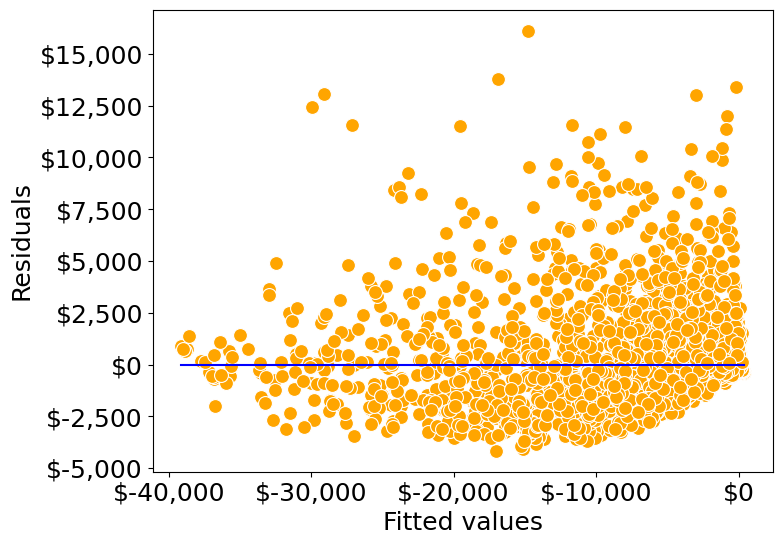

In [161]:
plt.rcParams["figure.figsize"] = (8,6)
ax = sns.scatterplot(x = model2.fittedvalues, y=model2.resid,color = 'orange')
sns.lineplot(x = [prediction2.min(),prediction2.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')

In [162]:
test_run_2 = pd.concat([test.id, prediction2], axis = 1)
test_run_2 = test_run_2.rename(columns = {0: 'Predicted'})
test_run_2.to_csv('test_run_2.csv', index = False)

In [163]:
model3 = smf.ols(formula = 'money_made_inv~loan_amnt+I(loan_amnt**2)+out_prncp_inv+I(out_prncp_inv**2)+loan_amnt*out_prncp_inv', data = train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         money_made_inv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 2.859e+04
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:15:00   Log-Likelihood:                -49659.
No. Observations:                5778   AIC:                         9.933e+04
Df Residuals:                    5772   BIC:                         9.937e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -237.8517     57.854     -4.111      0.000    -351.267    -124.437
loan_amnt                   0.0557      0.008      7.190      0.000       0.040       0.071
I(loan_amnt ** 2)       -1.418e-06   2.16e-07     -6.575      0.000   -1.84e-06   -9.95e-07
out_prncp_inv              -0.8668      0.008   -109.783      0.000      -0.882      -0.851
I(out_prncp_inv ** 2)   -3.106e-05    4.9e-07    -63.397      0.000    -3.2e-05   -3.01e-05
loan_amnt:out_prncp_inv  2.599e-05   5.24e-07     49.622      0.000     2.5e-05     2.7e-05
==============================================================================
Omnibus:                     3689.909   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103942.228
Skew:                           2.599   Prob(JB):                         0.00
Kurtosis:                      23.118   Cond. No.                     1.82e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
prediction3 = model3.predict(train)
np.sqrt(((train.money_made_inv - prediction3)**2).mean())

1307.0801716989095

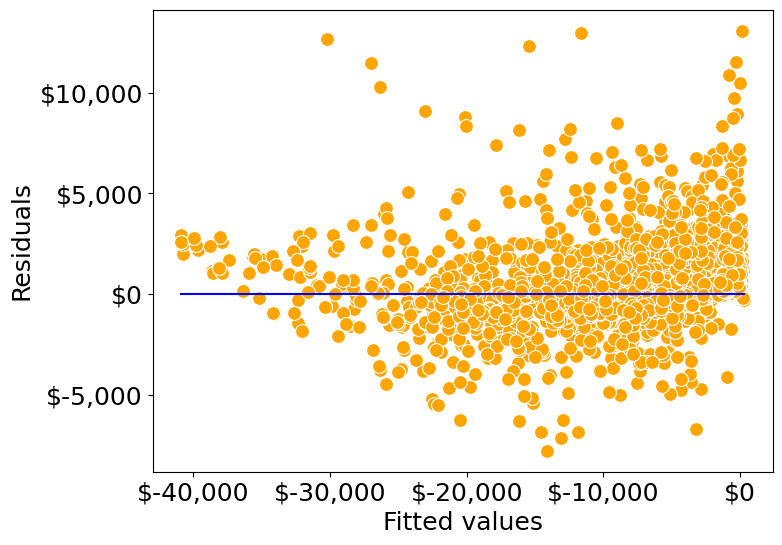

In [165]:
plt.rcParams["figure.figsize"] = (8,6)
ax = sns.scatterplot(x = model3.fittedvalues, y=model3.resid,color = 'orange')
sns.lineplot(x = [prediction3.min(),prediction3.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')

In [166]:
X = train[['loan_amnt','out_prncp_inv', 'bc_util']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

         feature       VIF
0          const  7.478490
1      loan_amnt  1.262996
2  out_prncp_inv  1.267450
3        bc_util  1.009829


In [167]:
index3 = pd.Series(list(range(1, prediction3.shape[0]+1)))
test_run_3 = pd.concat([index3, prediction3], axis = 1)
test_run_3 = test_run_3.rename(columns = {0: 'id', 1:'Predicted'})
test_run_3.set_index('id')
test_run_3.to_csv('test_run_3.csv', index = False)

In [168]:
model4 =  smf.ols(formula = 'money_made_inv ~ loan_amnt*out_prncp_inv + np.log(loan_amnt) + out_prncp_inv + I(out_prncp_inv**2)', data = train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         money_made_inv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 2.843e+04
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:15:01   Log-Likelihood:                -49675.
No. Observations:                5778   AIC:                         9.936e+04
Df Residuals:                    5772   BIC:                         9.940e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1866.3827    587.018     -3.179      0.001   -3017.158    -715.607
loan_amnt                  -0.0107      0.006     -1.810      0.070      -0.022       0.001
out_prncp_inv              -0.8509      0.007   -113.992      0.000      -0.865      -0.836
loan_amnt:out_prncp_inv  2.523e-05    5.1e-07     49.450      0.000    2.42e-05    2.62e-05
np.log(loan_amnt)         232.1376     71.073      3.266      0.001      92.807     371.468
I(out_prncp_inv ** 2)   -3.093e-05   4.91e-07    -62.984      0.000   -3.19e-05      -3e-05
==============================================================================
Omnibus:                     3681.467   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104362.399
Skew:                           2.588   Prob(JB):                         0.00
Kurtosis:                      23.167   Cond. No.                     1.12e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
prediction4 = model4.predict(train)
np.sqrt(((train.money_made_inv - prediction4)**2).mean())

1310.7554969801963

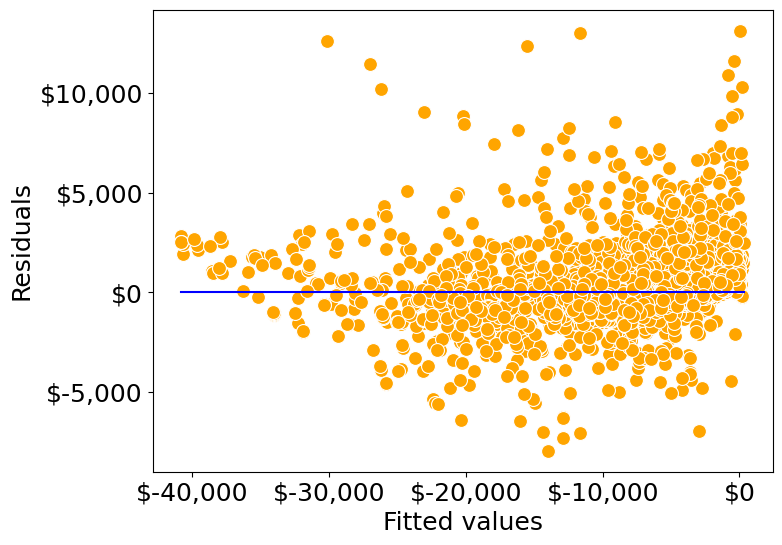

In [170]:
plt.rcParams["figure.figsize"] = (8,6)
ax = sns.scatterplot(x = model4.fittedvalues, y=model4.resid,color = 'orange')
sns.lineplot(x = [prediction4.min(),prediction4.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')

In [171]:
test.head()

,id,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,application_type,avg_cur_bal,bc_util,delinq_2yrs,delinq_amnt,...,out_prncp_inv,pub_rec,pub_rec_bankruptcies,purpose,sub_grade,term,tot_coll_amt,tot_cur_bal,total_rec_late_fee,verification_status
0,1,0,10,NY,45000.0,Individual,3125,40.6,0,0,...,0.00,0,0,medical,D4,60 months,379,65615,0.0,Source Verified
1,2,0,1,NY,40000.0,Individual,1534,26.6,0,0,...,0.00,0,0,credit_card,B1,36 months,0,13806,0.0,Not Verified
2,3,0,1,FL,113000.0,Individual,49748,82.6,0,0,...,8141.22,0,0,debt_consolidation,A4,36 months,0,447731,0.0,Verified
3,4,0,6,CA,105000.0,Individual,42642,81.8,0,0,...,0.00,0,0,credit_card,B1,36 months,0,469067,0.0,Not Verified
4,5,0,9,CA,80000.0,Individual,4766,52.2,0,0,...,0.00,0,0,home_improvement,A1,36 months,0,100087,0.0,Not Verified


In [172]:
pred = model3.predict(test)
test = test.assign(Predicted = pred)
test.loc[test.out_prncp_inv == 0, 'Predicted'] = 0
test[['Predicted', 'id']].to_csv("pred3.csv", index = False)

In [173]:
pred = model2.predict(test)
test = test.assign(Predicted = pred)
test.loc[test.out_prncp_inv == 0, 'Predicted'] = 0
test[['Predicted', 'id']].to_csv("pred2.csv", index = False)

In [174]:
pred = model4.predict(test)
test = test.assign(Predicted = pred)
test.loc[test.out_prncp_inv == 0, 'Predicted'] = 0
test[['Predicted', 'id']].to_csv("pred4.csv", index = False)

In [175]:
pred = model1.predict(test)
test = test.assign(Predicted = pred)
test.loc[test.out_prncp_inv == 0, 'Predicted'] = 0
test[['Predicted', 'id']].to_csv("pred1.csv", index = False)

In [176]:
model5 = smf.ols('money_made_inv~out_prncp_inv+loan_amnt+loan_amnt*out_prncp_inv', data = train.loc[train.out_prncp_inv != 0]).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         money_made_inv   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.508e+04
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:15:03   Log-Likelihood:                -21846.
No. Observations:                2444   AIC:                         4.370e+04
Df Residuals:                    2440   BIC:                         4.372e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -659.3843    106.184     -6.210      0.000    -867.605    -451.164
out_prncp_inv              -1.1609      0.014    -81.320      0.000      -1.189      -1.133
loan_amnt                   0.3260      0.008     42.583      0.000       0.311       0.341
loan_amnt:out_prncp_inv -2.432e-06   4.32e-07     -5.632      0.000   -3.28e-06   -1.59e-06
==============================================================================
Omnibus:                     1065.855   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9460.054
Skew:                           1.833   Prob(JB):                         0.00
Kurtosis:                      11.914   Cond. No.                     1.10e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [177]:
prediction5 = model5.predict(train)
np.sqrt(((train.money_made_inv - prediction5)**2).mean())

4061.480994401893

In [178]:
model6 = smf.ols(formula = 'money_made_inv~out_prncp_inv+loan_amnt', data = train).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         money_made_inv   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 4.056e+04
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:15:04   Log-Likelihood:                -51214.
No. Observations:                5778   AIC:                         1.024e+05
Df Residuals:                    5775   BIC:                         1.025e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -14.9158     44.007     -0.339      0.735    -101.187      71.355
out_prncp_inv    -0.8738      0.003   -258.742      0.000      -0.880      -0.867
loan_amnt         0.0293      0.003     10.724      0.000       0.024       0.035
==============================================================================
Omnibus:                     3759.182   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58178.363
Skew:                           2.904   Prob(JB):                         0.00
Kurtosis:                      17.420   Cond. No.                     3.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
prediction6 = model6.predict(train)
np.sqrt(((train.money_made_inv - prediction6)**2).mean())

1710.6245757544348

In [180]:
pred = model6.predict(test)
test = test.assign(Predicted = pred)
test.loc[test.out_prncp_inv == 0, 'Predicted'] = 0
test[['Predicted', 'id']].to_csv("pred6.csv", index = False)

In [181]:
model7 =  smf.ols(formula = 'money_made_inv ~ out_prncp_inv', data = train).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         money_made_inv   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 7.943e+04
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:15:04   Log-Likelihood:                -51271.
No. Observations:                5778   AIC:                         1.025e+05
Df Residuals:                    5776   BIC:                         1.026e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       364.7665     26.395     13.819      0.000     313.022     416.511
out_prncp_inv    -0.8575      0.003   -281.834      0.000      -0.863      -0.852
==============================================================================
Omnibus:                     3957.138   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66554.964
Skew:                           3.093   Prob(JB):                         0.00
Kurtosis:                      18.433   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
predictions = pd.DataFrame({"id":test.iloc[:, 0], "Predicted":model7.predict(test)})
test_zero = list(test[test["out_prncp_inv"]==0].index)
predictions.loc[test_zero, "Predicted"] = 0
predictions.to_csv("pred7.csv", index = False)

## Reset

In [4]:
train.corrwith(train.money_made_inv).sort_values(ascending = False)

money_made_inv          1.000000
bc_util                 0.095192
pub_rec                 0.057876
delinq_2yrs             0.049182
int_rate                0.049109
acc_open_past_24mths    0.048269
total_rec_late_fee      0.033735
num_tl_90g_dpd_24m      0.025438
tot_coll_amt            0.024828
pub_rec_bankruptcies    0.023218
acc_now_delinq          0.021542
num_tl_30dpd            0.015502
num_tl_120dpd_2m        0.013539
mort_acc                0.003898
delinq_amnt             0.001890
dti                     0.001325
num_sats               -0.037346
avg_cur_bal            -0.056990
annual_inc             -0.064129
tot_cur_bal            -0.077973
id                     -0.299772
loan_amnt              -0.403774
out_prncp_inv          -0.965511
dtype: float64

In [5]:
train.corrwith(train.acc_now_delinq).sort_values(ascending = False)

acc_now_delinq          1.000000
num_tl_30dpd            0.861804
num_tl_120dpd_2m        0.358386
delinq_2yrs             0.101060
delinq_amnt             0.071018
tot_cur_bal             0.059235
num_tl_90g_dpd_24m      0.052064
avg_cur_bal             0.036816
num_sats                0.033272
annual_inc              0.028007
mort_acc                0.021778
money_made_inv          0.021542
acc_open_past_24mths    0.006014
loan_amnt               0.004237
int_rate                0.001562
pub_rec                -0.005001
total_rec_late_fee     -0.007519
tot_coll_amt           -0.008221
dti                    -0.009204
pub_rec_bankruptcies   -0.014380
out_prncp_inv          -0.023220
id                     -0.034792
bc_util                -0.043204
dtype: float64

In [6]:
train.corrwith(train.avg_cur_bal).sort_values(ascending = False)

avg_cur_bal             1.000000
tot_cur_bal             0.831791
mort_acc                0.456157
loan_amnt               0.227892
annual_inc              0.181443
bc_util                 0.089133
delinq_2yrs             0.069945
out_prncp_inv           0.069300
num_tl_120dpd_2m        0.048408
acc_now_delinq          0.036816
num_tl_90g_dpd_24m      0.026288
num_tl_30dpd            0.023418
total_rec_late_fee      0.018973
delinq_amnt             0.014222
tot_coll_amt            0.002623
id                      0.001703
pub_rec                -0.047823
pub_rec_bankruptcies   -0.056577
money_made_inv         -0.056990
int_rate               -0.059838
acc_open_past_24mths   -0.064451
dti                    -0.107312
num_sats               -0.109170
dtype: float64

In [7]:
train.corrwith(train.delinq_2yrs).sort_values(ascending = False)

delinq_2yrs             1.000000
num_tl_90g_dpd_24m      0.683319
acc_now_delinq          0.101060
num_tl_30dpd            0.079751
mort_acc                0.077464
avg_cur_bal             0.069945
tot_cur_bal             0.067538
int_rate                0.053103
delinq_amnt             0.050851
money_made_inv          0.049182
num_tl_120dpd_2m        0.034589
num_sats                0.028381
total_rec_late_fee      0.022252
annual_inc              0.019626
id                     -0.006772
tot_coll_amt           -0.007342
pub_rec                -0.016203
bc_util                -0.019922
loan_amnt              -0.035382
out_prncp_inv          -0.039191
dti                    -0.040028
acc_open_past_24mths   -0.048187
pub_rec_bankruptcies   -0.072919
dtype: float64

In [8]:
train.corrwith(train.pub_rec).sort_values(ascending = False)

pub_rec                 1.000000
pub_rec_bankruptcies    0.652049
int_rate                0.071043
acc_open_past_24mths    0.071031
money_made_inv          0.057876
total_rec_late_fee      0.030878
tot_coll_amt            0.015306
delinq_amnt             0.001738
mort_acc               -0.001259
num_tl_30dpd           -0.003326
acc_now_delinq         -0.005001
annual_inc             -0.005172
num_tl_120dpd_2m       -0.008998
bc_util                -0.010145
delinq_2yrs            -0.016203
num_tl_90g_dpd_24m     -0.017544
id                     -0.038177
avg_cur_bal            -0.047823
dti                    -0.048120
num_sats               -0.049352
loan_amnt              -0.051206
out_prncp_inv          -0.054543
tot_cur_bal            -0.070877
dtype: float64

### Just money_made_inv with out_prncp_inv where out_prncp_inv is not 0

In [9]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from itertools import product
from sklearn.metrics import roc_curve, auc

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [11]:
# Only getting observations with out_prncp_inv not equal to 0
train_1 = train.loc[train.out_prncp_inv != 0]

In [12]:
train_1.head()

,id,money_made_inv,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,application_type,avg_cur_bal,bc_util,delinq_2yrs,...,out_prncp_inv,pub_rec,pub_rec_bankruptcies,purpose,sub_grade,term,tot_coll_amt,tot_cur_bal,total_rec_late_fee,verification_status
0,3819,-2787.38,0,2,CT,21120.0,Individual,3662,86.1,0,...,3828.54,0,0,debt_consolidation,C1,36 months,0,65921,0.0,Verified
3,3822,-7951.97,0,1,NJ,66976.0,Individual,1638,77.4,0,...,9665.27,0,0,debt_consolidation,C1,60 months,0,9830,0.0,Source Verified
4,3823,-8058.76,0,2,MO,125000.0,Individual,577,0.0,0,...,11358.24,0,0,debt_consolidation,A2,60 months,0,6924,0.0,Source Verified
8,3827,-21127.76,0,8,IL,75500.0,Individual,7046,48.1,0,...,21534.57,1,1,debt_consolidation,B3,36 months,0,155020,0.0,Source Verified
16,3835,-12572.07,0,4,GA,42000.0,Individual,1372,44.6,0,...,13186.35,0,0,other,B2,36 months,0,13722,0.0,Not Verified


In [13]:
train_1.columns

Index(['id', 'money_made_inv', 'acc_now_delinq', 'acc_open_past_24mths',
       'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal',
       'bc_util', 'delinq_2yrs', 'delinq_amnt', 'dti', 'earliest_cr_line',
       'emp_length', 'emp_title', 'grade', 'home_ownership',
       'initial_list_status', 'int_rate', 'last_credit_pull_d', 'loan_amnt',
       'mort_acc', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'out_prncp_inv', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'sub_grade', 'term', 'tot_coll_amt', 'tot_cur_bal',
       'total_rec_late_fee', 'verification_status'],
      dtype='object')

In [14]:
model10 =  sm.ols(formula = 'money_made_inv ~ out_prncp_inv', data = train_1).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         money_made_inv   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 2.357e+04
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:12:17   Log-Likelihood:                -22588.
No. Observations:                2444   AIC:                         4.518e+04
Df Residuals:                    2442   BIC:                         4.519e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1643.1866     81.018     20.282      0.000    1484.315    1802.058
out_prncp_inv    -0.9324      0.006   -153.514      0.000      -0.944      -0.920
==============================================================================
Omnibus:                     1071.141   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4991.806
Skew:                           2.108   Prob(JB):                         0.00
Kurtosis:                       8.590   Cond. No.                     2.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
predictions = pd.DataFrame({"id":test.iloc[:, 0], "Predicted":model10.predict(test)})
test_zero = list(test[test["out_prncp_inv"]==0].index)
predictions.loc[test_zero, "Predicted"] = 0
predictions.to_csv("pred10.csv", index = False)

### Forward Selection

In [16]:
model11 = sm.ols('money_made_inv ~ acc_now_delinq + acc_open_past_24mths + annual_inc +\
avg_cur_bal + bc_util + delinq_2yrs + delinq_amnt + dti +\
int_rate + loan_amnt + mort_acc + num_sats + \
num_tl_120dpd_2m + num_tl_90g_dpd_24m + num_tl_30dpd + out_prncp_inv + pub_rec + pub_rec_bankruptcies +\
tot_coll_amt + tot_cur_bal + total_rec_late_fee', data = train_1).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         money_made_inv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     4085.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:12:18   Log-Likelihood:                -21144.
No. Observations:                2444   AIC:                         4.233e+04
Df Residuals:                    2423   BIC:                         4.245e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3438.5303    125.218    -27.460      0.000   -3684.075   -3192.985
acc_now_delinq         227.1873   1397.924      0.163      0.871   -2514.062    2968.437
acc_open_past_24mths   -15.2446     11.165     -1.365      0.172     -37.139       6.650
annual_inc               0.0001      0.000      0.919      0.358      -0.000       0.000
avg_cur_bal              0.0055      0.004      1.492      0.136      -0.002       0.013
bc_util                 -1.2449      1.112     -1.119      0.263      -3.426       0.936
delinq_2yrs             31.3879     42.108      0.745      0.456     -51.183     113.959
delinq_amnt             -0.1600      0.135     -1.187      0.235      -0.424       0.104
dti                     -0.8539      3.378     -0.253      0.800      -7.477       5.770
int_rate               261.1851      6.618     39.465      0.000     248.207     274.163
loan_amnt                0.3150      0.005     58.246      0.000       0.304       0.326
mort_acc                75.5638     18.195      4.153      0.000      39.885     111.243
num_sats                13.9918      7.243      1.932      0.054      -0.212      28.195
num_tl_120dpd_2m      6.599e-13   1.12e-12      0.588      0.557   -1.54e-12    2.86e-12
num_tl_90g_dpd_24m     -52.8971     81.215     -0.651      0.515    -212.156     106.361
num_tl_30dpd         -1154.0400   1528.729     -0.755      0.450   -4151.791    1843.711
out_prncp_inv           -1.2526      0.006   -202.521      0.000      -1.265      -1.240
pub_rec                165.0480     86.228      1.914      0.056      -4.040     334.136
pub_rec_bankruptcies  -182.9768    130.198     -1.405      0.160    -438.288      72.334
tot_coll_amt            -0.0273      0.021     -1.306      0.192      -0.068       0.014
tot_cur_bal             -0.0008      0.000     -2.000      0.046      -0.002   -1.56e-05
total_rec_late_fee       6.8038      1.744      3.901      0.000       3.384      10.224
==============================================================================
Omnibus:                      617.003   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5307.926
Skew:                           0.945   Prob(JB):                         0.00
Kurtosis:                       9.968   Cond. No.                     1.22e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
#Creating a set of predictors from which we need to find the best subset of predictors
X = train_1[['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal',
       'bc_util', 'delinq_2yrs', 'delinq_amnt', 'dti', 'int_rate', 'loan_amnt',
       'mort_acc', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'out_prncp_inv', 'pub_rec', 'pub_rec_bankruptcies',
       'tot_coll_amt', 'tot_cur_bal', 'total_rec_late_fee']]

In [18]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('money_made_inv ~' + '+'.join(predictor_subset),data = train_1).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [19]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [20]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [21]:
models_best = forward_selection()

Processed  21 models on 1 predictors in 0.17510700225830078 seconds.
Processed  20 models on 2 predictors in 0.2707488536834717 seconds.
Processed  19 models on 3 predictors in 0.33813905715942383 seconds.
Processed  18 models on 4 predictors in 0.31990504264831543 seconds.
Processed  17 models on 5 predictors in 0.2809481620788574 seconds.
Processed  16 models on 6 predictors in 0.3169081211090088 seconds.
Processed  15 models on 7 predictors in 0.3102560043334961 seconds.
Processed  14 models on 8 predictors in 0.3054239749908447 seconds.
Processed  13 models on 9 predictors in 0.3014390468597412 seconds.
Processed  12 models on 10 predictors in 0.30181121826171875 seconds.
Processed  11 models on 11 predictors in 0.29781007766723633 seconds.
Processed  10 models on 12 predictors in 0.2933471202850342 seconds.
Processed  9 models on 13 predictors in 0.27222681045532227 seconds.
Processed  8 models on 14 predictors in 0.26680493354797363 seconds.
Processed  7 models on 15 predictors i

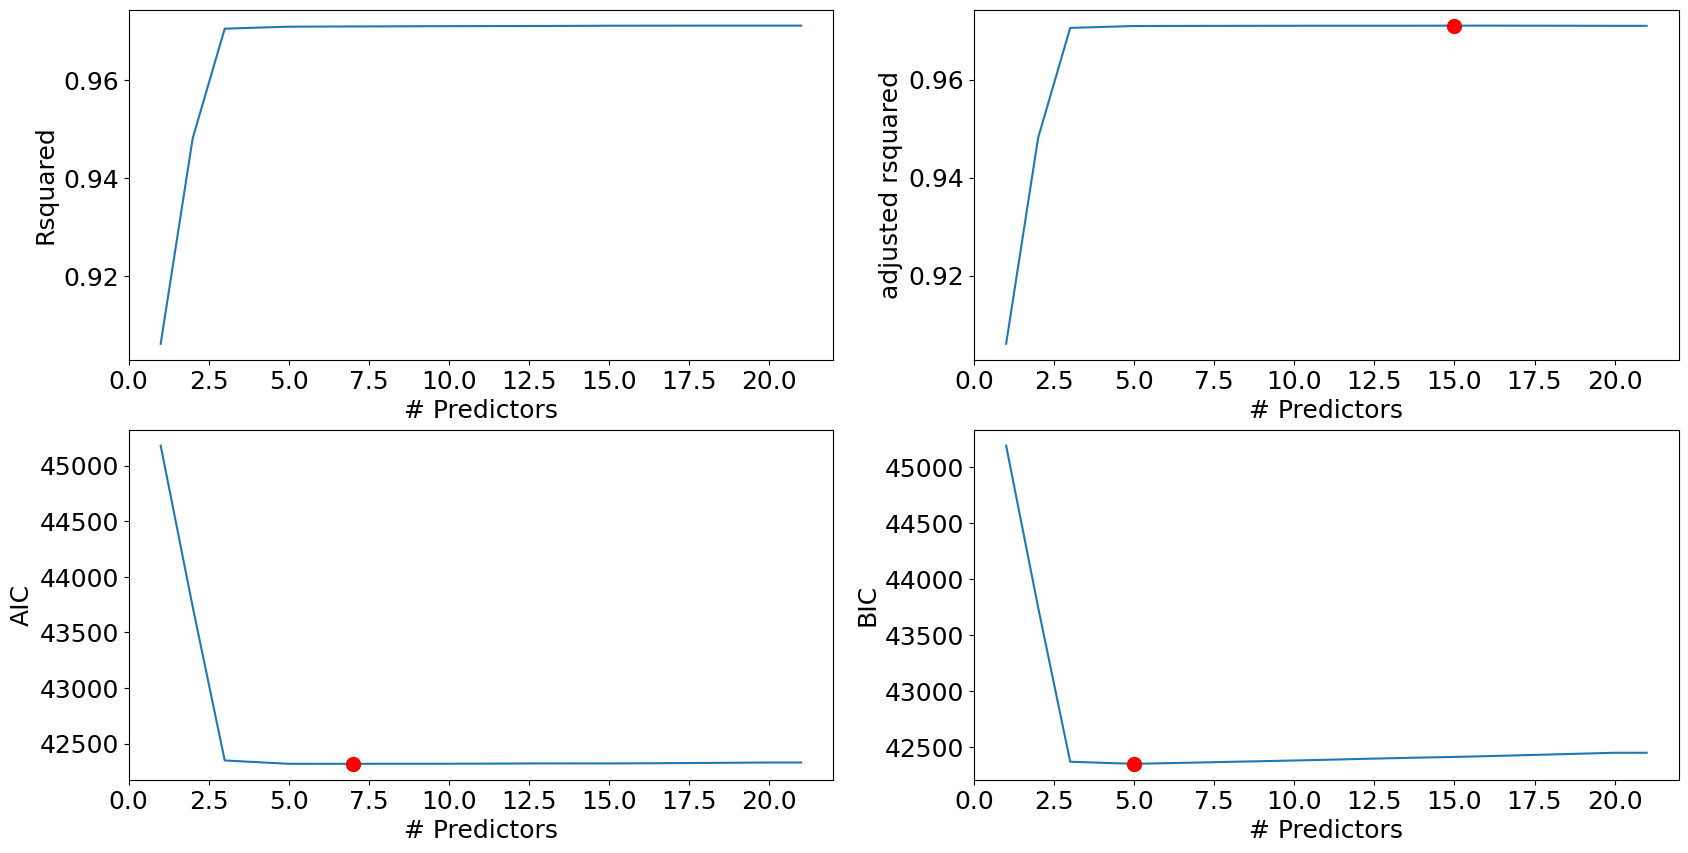

In [23]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [24]:
best_fwd_reg_model = models_best['model'][5]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         money_made_inv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.631e+04
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:13:08   Log-Likelihood:                -21153.
No. Observations:                2444   AIC:                         4.232e+04
Df Residuals:                    2438   BIC:                         4.235e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3388.9167     92.160    -36.772      0.000   -3569.637   -3208.196
out_prncp_inv         -1.2523      0.006   -205.928      0.000      -1.264      -1.240
loan_amnt              0.3150      0.005     59.782      0.000       0.305       0.325
int_rate             257.2839      5.973     43.073      0.000     245.571     268.997
mort_acc              63.6705     15.267      4.170      0.000      33.733      93.608
total_rec_late_fee     7.1305      1.736      4.109      0.000       3.727      10.534
==============================================================================
Omnibus:                      619.456   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5204.546
Skew:                           0.956   Prob(JB):                         0.00
Kurtosis:                       9.888   Cond. No.                     7.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
best_fwd_reg_model = models_best['model'][7]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         money_made_inv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.166e+04
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:13:08   Log-Likelihood:                -21151.
No. Observations:                2444   AIC:                         4.232e+04
Df Residuals:                    2436   BIC:                         4.236e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3378.5861     92.426    -36.554      0.000   -3559.828   -3197.344
out_prncp_inv         -1.2529      0.006   -205.930      0.000      -1.265      -1.241
loan_amnt              0.3162      0.005     59.447      0.000       0.306       0.327
int_rate             257.2003      5.971     43.073      0.000     245.491     268.910
mort_acc              78.1451     17.969      4.349      0.000      42.908     113.382
total_rec_late_fee     7.1352      1.735      4.113      0.000       3.733      10.537
tot_cur_bal           -0.0003      0.000     -1.425      0.154      -0.001       0.000
num_tl_30dpd        -881.3205    623.359     -1.414      0.158   -2103.688     341.047
==============================================================================
Omnibus:                      619.988   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5226.848
Skew:                           0.956   Prob(JB):                         0.00
Kurtosis:                       9.904   Cond. No.                     5.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### K-fold Cross Validation

In [26]:
predictor_set = ['out_prncp_inv','loan_amnt','int_rate','mort_acc', 'total_rec_late_fee']
from itertools import product
values = np.arange(0,5)
polynomial_transformations = pd.DataFrame(product(values, repeat=5), columns=predictor_set).loc[1:,]
polynomial_transformations.loc[:,'sum_degree'] = (polynomial_transformations).astype(int).sum(axis=1)
polynomial_transformations.loc[:,'count_zeros'] = (polynomial_transformations == 0).astype(int).sum(axis=1)
polynomial_transformations.sort_values(by = ['count_zeros', 'sum_degree'], ascending=[False, True], inplace=True)
polynomial_transformations.drop(columns = ['count_zeros'], inplace=True)
polynomial_transformations.reset_index(inplace = True, drop = True)

In [27]:
#Setting the seed as we are shuffling the data before splitting it into K-folds
np.random.seed(123)
# Shuffling the training set before creating K folds
train = train_1.sample(frac=1)
k = 7 #5-fold cross validation
fold_size = np.round(train_1.shape[0]/k)

In [28]:
def KFoldCV(selected_interactions, interaction_being_tested):
    cv_vals = []
    for ii in range(k):
        val_indices = np.arange(ii*(fold_size),(ii+1)*fold_size)
        val_set = train_1.iloc[val_indices, :]
        train_set = train_1.drop(train_1.iloc[val_indices, :].index.tolist())
        model = sm.ols('money_made_inv ~ out_prncp_inv + loan_amnt + int_rate + mort_acc +\
        total_rec_late_fee' + selected_interactions + interaction_being_tested, data = train_set).fit()
        pred_price = model.predict(val_set)     
        cv_vals.append(np.sqrt(((val_set['money_made_inv']-pred_price)**2).mean()))
    return (np.mean(cv_vals))

In [ ]:
# 5-fold cross validation RMSE of the initial model with the 4 predictors of degree one
cv_previous_model = KFoldCV(selected_interactions = '', interaction_being_tested = '')
interaction_being_tested = '+'
selected_interactions = ''

# Considering interactions of degree 'd' = 2 to 12
for d in np.arange(2,13):
    
    # Selecting interaction terms of degree = 'd'
    degree_set = polynomial_transformations.loc[polynomial_transformations.sum_degree==d, :]
    
    # Initializing objects to store the interactions of degree 'd' that reduce the
    # 5-fold cross validation RMSEs as compared to the previous model
    interactions_that_reduce_KfoldCV = []; cv_degree = []; 
    
    # Creating another DataFrame that will consist of the updated set of interactions of degree 'd' to be considered
    # as interactions that do not reduce the 5-fold cross validation RMSE will be discarded
    degree_set_updated = pd.DataFrame(columns = degree_set.columns)
    
    # Continue adding interactions of degree 'd' in the model until no interactions reduce 
    # the 5-fold cross-validation RMSE
    while True:
        
        #Iterating over all possible interactions of degree 'd'
        for index, row in degree_set.iterrows():
            
            # Creating the formula expression for the interaction term to be tested
            for predictor in predictor_set:
                interaction_being_tested = interaction_being_tested + ('I('+predictor +'**' +\
                                         str(row[predictor]) + ')*' if row[predictor]>1 else\
                                               predictor + '*' if row[predictor]==1 else '')
            interaction_being_tested = interaction_being_tested[:-1]
            
            # Call the function 'KFoldCV' to find out the 5-fold cross validation error on adding the 
            # interaction term being tested to the model
            cv = KFoldCV(selected_interactions, interaction_being_tested)
            
            # If the interaction term being tested reduces the 5-fold cross validation RMSE as compared to the
            # previous model, then consider adding it to the model
            if cv<cv_previous_model:
                interactions_that_reduce_KfoldCV.append(interaction_being_tested)
                cv_degree.append(cv)
                degree_set_updated = pd.concat([degree_set_updated, row.to_frame().T])
            interaction_being_tested = '+'
        cv_data = pd.DataFrame({'interaction':interactions_that_reduce_KfoldCV, 'cv':cv_degree})
        
        # Sort the interaction terms that reduce the 5-fold cross valdiation RMSE based on their respective
        # 5-fold cross validation RMSE
        cv_data.sort_values(by = 'cv', inplace = True)
        
        # Break the loop if no interaction of degree 'd' reduces the 5-fold cross validation RMSE as
        # compared to the previous model
        if cv_data.shape[0]==0:
            break
            
        # Select the interaction that corresponds to the least 5-fold cross validation RMSE
        selected_interactions = selected_interactions + cv_data.iloc[0,0]
        cv_previous_model = cv_data.iloc[0,1]
        cv_degree = []; interactions_that_reduce_KfoldCV = []
        degree_set = degree_set_updated.copy()
        degree_set_updated = pd.DataFrame(columns = degree_set.columns)
        
        # Print the progress after each model update, i.e., after an interaction term is selected
        print("Degree of interactions being considered:",d, ", 5-fold CV RMSE:", cv_previous_model)

Degree of interactions being considered: 2 , 5-fold CV RMSE: 1224.0821140497299
Degree of interactions being considered: 2 , 5-fold CV RMSE: 1128.7093502327425
Degree of interactions being considered: 2 , 5-fold CV RMSE: 1108.174809672955
Degree of interactions being considered: 2 , 5-fold CV RMSE: 1103.5434348984757
Degree of interactions being considered: 2 , 5-fold CV RMSE: 1103.0756979137202
Degree of interactions being considered: 3 , 5-fold CV RMSE: 1023.0516854345414
Degree of interactions being considered: 3 , 5-fold CV RMSE: 995.2173896017806
Degree of interactions being considered: 3 , 5-fold CV RMSE: 989.79723581256
Degree of interactions being considered: 3 , 5-fold CV RMSE: 987.1784430694422
Degree of interactions being considered: 3 , 5-fold CV RMSE: 985.4880836029123
Degree of interactions being considered: 4 , 5-fold CV RMSE: 967.050560869693
Degree of interactions being considered: 4 , 5-fold CV RMSE: 937.6173573617027
Degree of interactions being considered: 4 , 5-fol

In [ ]:
selected_interactions

In [ ]:
model16 = sm.ols('money_made_inv ~ out_prncp_inv + loan_amnt + int_rate + mort_acc +\
        total_rec_late_fee + loan_amnt*int_rate + out_prncp_inv*int_rate + I(out_prncp_inv**2) +\
        I(total_rec_late_fee**2) + int_rate*mort_acc + out_prncp_inv*loan_amnt*total_rec_late_fee + \
        I(loan_amnt**2)*mort_acc + I(out_prncp_inv**2)*int_rate + I(int_rate**3) + I(out_prncp_inv**2)*loan_amnt+\
        out_prncp_inv*I(loan_amnt**2)*int_rate + I(loan_amnt**3)*int_rate + out_prncp_inv*I(int_rate**3) +\
        I(out_prncp_inv**2)*loan_amnt*int_rate + I(out_prncp_inv**3)*int_rate*mort_acc + I(loan_amnt**3)*I(int_rate**2) +\
        I(loan_amnt**3)*I(total_rec_late_fee**2)', data = train).fit()
model16.summary()

In [225]:
predictions = pd.DataFrame({"id":test.iloc[:, 0], "Predicted":model16.predict(test)})
test_zero = list(test[test["out_prncp_inv"]==0].index)
predictions.loc[test_zero, "Predicted"] = 0
predictions.to_csv("pred16.csv", index = False)

### Lasso

In [233]:
y = train_1.money_made_inv

# Filtering through the predictors
#Creating a set of predictors from which we need to find the best subset of predictors
X = train_1[['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal',
       'bc_util', 'delinq_2yrs', 'delinq_amnt', 'dti', 'int_rate', 'loan_amnt',
       'mort_acc', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'out_prncp_inv', 'pub_rec', 'pub_rec_bankruptcies',
       'tot_coll_amt', 'tot_cur_bal', 'total_rec_late_fee']]

#Standardizing predictors so that each of them have zero mean and unit variance

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

In [235]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.05

In [244]:
#Test dataset
Xtest = test[['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal',
       'bc_util', 'delinq_2yrs', 'delinq_amnt', 'dti', 'int_rate', 'loan_amnt',
       'mort_acc', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'out_prncp_inv', 'pub_rec', 'pub_rec_bankruptcies',
       'tot_coll_amt', 'tot_cur_bal', 'total_rec_late_fee']]

#Standardizing test data
Xtest_std = scaler.transform(Xtest)

In [251]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

In [252]:
predictions = pd.DataFrame({"id":test.iloc[:, 0], "Predicted":lasso.predict(test)})
test_zero = list(test[test["out_prncp_inv"]==0].index)
predictions.loc[test_zero, "Predicted"] = 0
predictions.to_csv("pred18.csv", index = False)

/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'NY'